<a href="https://colab.research.google.com/github/DeathNOTbook/my-deposit/blob/master/HEART_DISEASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Health - A Statistical Analysis

### We begin our analysis by first asking some basic questions like -

Who are the people in our dataset? (Ages,Gender,cp, etc)

How do various factors like sex and chest pain relate to each other ? Do we observe any trends?

### Finding Probabilities

Which distribution do the various factors like resting blood pressure and  maximum heart rate follow?

### Applying statistical  concepts to solve some questions

Binomial Distribution

Finding the Confidence Intervals

Chi-Square Analysis

Hypthesis Testing

Bayes Theorem

In [334]:
import seaborn as sns
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [348]:
import math
import scipy
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.stats import norm

import thinkplot
import thinkstats2

In [12]:
data = pd.read_csv('heart.csv')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [158]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


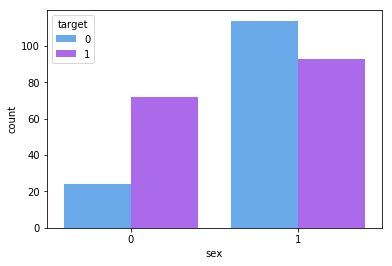

In [24]:
sns.countplot("sex", data=data, hue = "target", palette = 'cool')

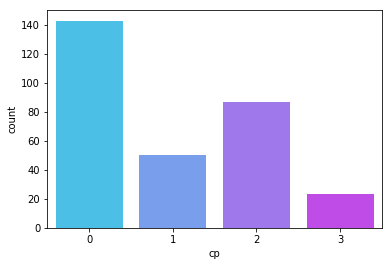

In [21]:
sns.countplot("cp", data=data, palette = 'cool')

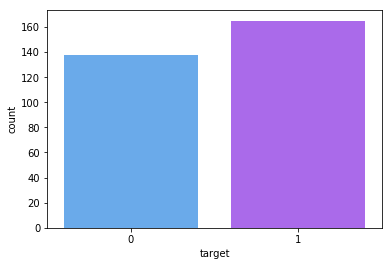

In [22]:
sns.countplot("target", data=data, palette = 'cool')

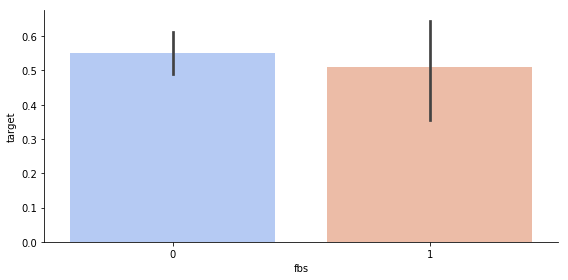

In [318]:
sns.catplot(data=data,x='fbs',y='target',kind='bar',height=4,aspect=2,palette='coolwarm')

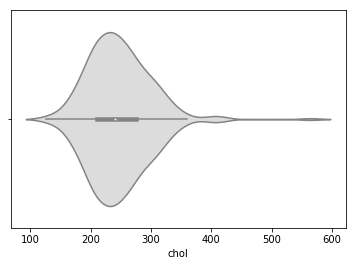

In [325]:
sns.violinplot(data=data,x='chol',palette='coolwarm')

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <a list of 10 Patch objects>)

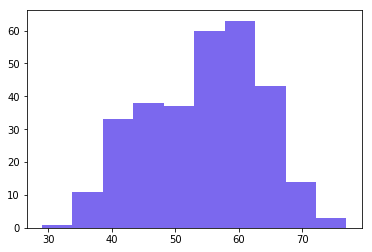

In [209]:
plt.hist("age", data = data,  bins = 10, color = 'mediumslateblue')

(array([10., 42., 67., 74., 57., 27., 13.,  8.,  3.,  2.]),
 array([ 94. , 104.6, 115.2, 125.8, 136.4, 147. , 157.6, 168.2, 178.8,
        189.4, 200. ]),
 <a list of 10 Patch objects>)

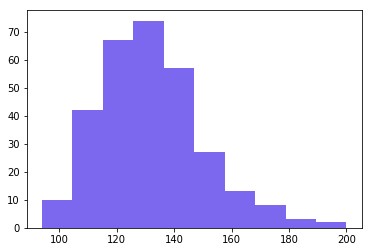

In [212]:
plt.hist("trestbps", data = data,  bins = 10, color = 'mediumslateblue')

(array([ 1.,  6., 11., 26., 35., 53., 77., 63., 26.,  5.]),
 array([ 71. ,  84.1,  97.2, 110.3, 123.4, 136.5, 149.6, 162.7, 175.8,
        188.9, 202. ]),
 <a list of 10 Patch objects>)

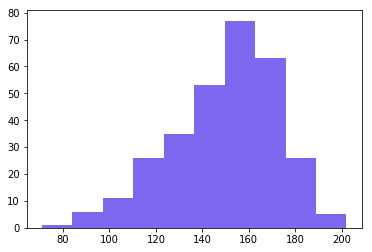

In [216]:
plt.hist("thalach", data = data,  bins = 10, color = 'mediumslateblue')

In [25]:
data['age'].mean()

54.366336633663366

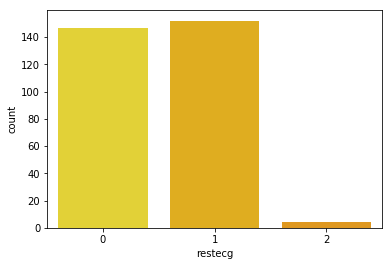

In [26]:
sns.countplot("restecg", data=data, palette = 'Wistia')

In [30]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [31]:
data['age'].min()

29

In [32]:
data['age'].max()

77

In [238]:
data1 = data[data['chol'] > 240]

In [239]:
data1['target'].value_counts()

0    79
1    72
Name: target, dtype: int64

In [240]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 299
Data columns (total 14 columns):
age         151 non-null int64
sex         151 non-null int64
cp          151 non-null int64
trestbps    151 non-null int64
chol        151 non-null int64
fbs         151 non-null int64
restecg     151 non-null int64
thalach     151 non-null int64
exang       151 non-null int64
oldpeak     151 non-null float64
slope       151 non-null int64
ca          151 non-null int64
thal        151 non-null int64
target      151 non-null int64
dtypes: float64(1), int64(13)
memory usage: 17.7 KB


In [241]:
dis = data[data['target'] == 1]

In [242]:
dis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 14 columns):
age         165 non-null int64
sex         165 non-null int64
cp          165 non-null int64
trestbps    165 non-null int64
chol        165 non-null int64
fbs         165 non-null int64
restecg     165 non-null int64
thalach     165 non-null int64
exang       165 non-null int64
oldpeak     165 non-null float64
slope       165 non-null int64
ca          165 non-null int64
thal        165 non-null int64
target      165 non-null int64
dtypes: float64(1), int64(13)
memory usage: 19.3 KB


In [42]:
dis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


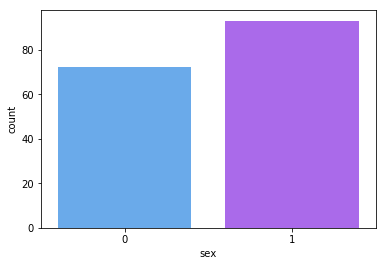

In [43]:
sns.countplot("sex", data=dis, palette = 'cool')

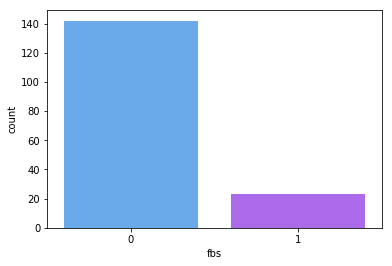

In [45]:
sns.countplot("fbs", data=dis, palette = 'cool')

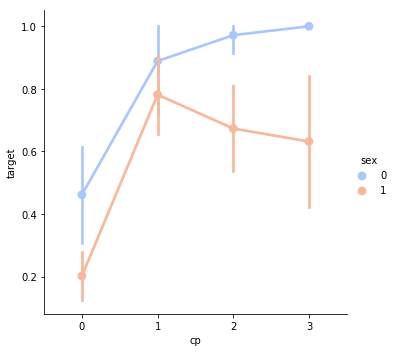

In [50]:
sns.catplot(x = 'cp', y = 'target', kind = 'point', data = data, hue = 'sex', palette = 'coolwarm')

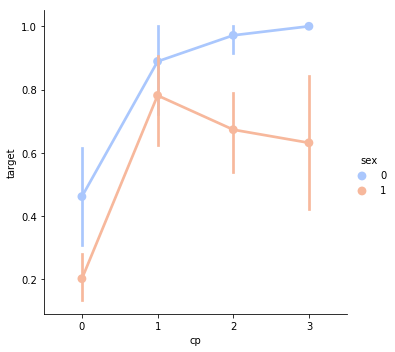

In [58]:
sns.catplot(x = 'cp', y = 'target', kind = 'point', data = data, hue = 'sex', palette = 'coolwarm')

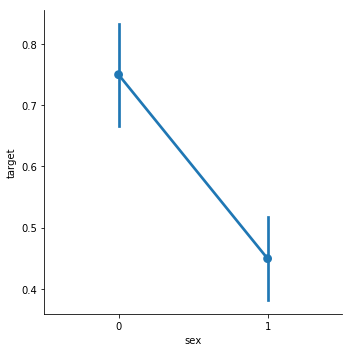

In [315]:
sns.catplot(data=data,x='sex',y='target',kind='point')

In [55]:
generations = [30,40,50,60,70,80]

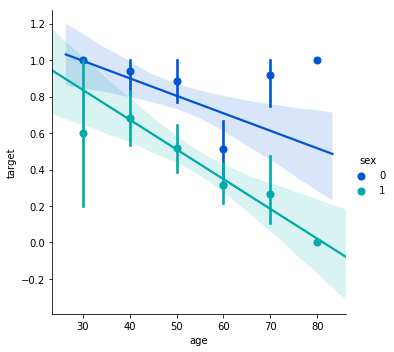

In [56]:
sns.lmplot('age', 'target', data = data, palette = 'winter', hue = 'sex', x_bins = generations)

In [261]:
pmf = thinkstats2.Pmf(data.trestbps, label='BP')

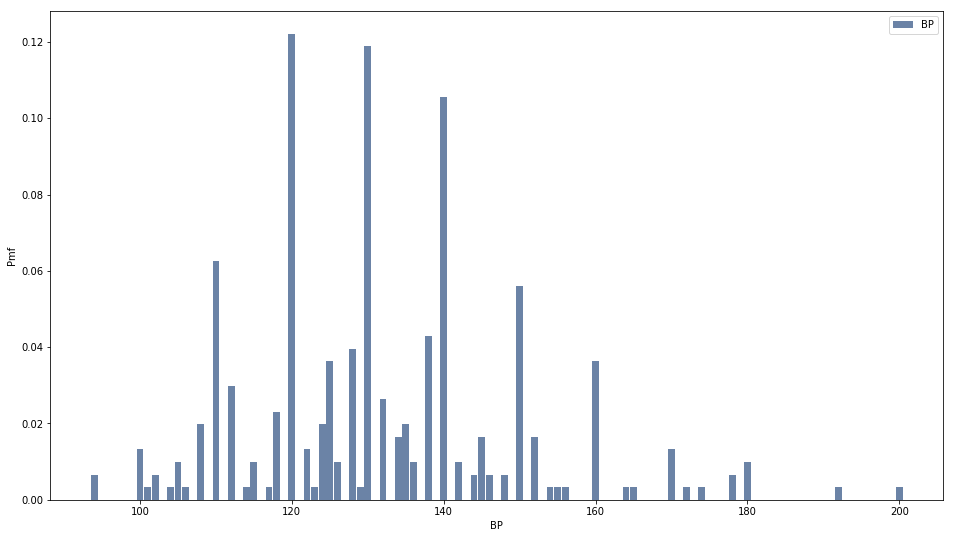

In [262]:
plt.figure(figsize=(16,9))
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='BP', ylabel='Pmf')

<Figure size 1152x648 with 0 Axes>

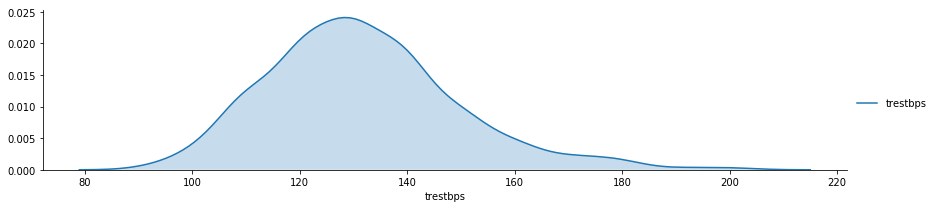

In [339]:
plt.figure(figsize=(16,9))
fig = sns.FacetGrid(data, aspect=4)
fig.map(sns.kdeplot, 'trestbps', shade = True)
fig.add_legend()
#fig.set(xlim = (20,90))

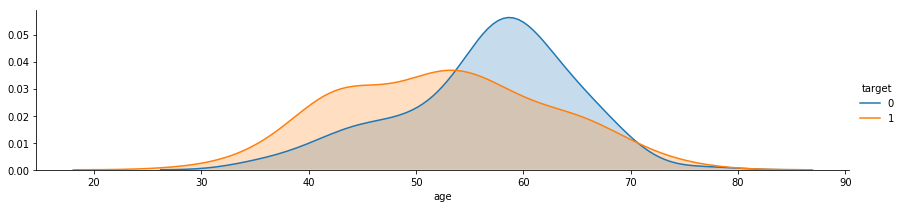

In [266]:
fig = sns.FacetGrid(data, hue = 'target', aspect=4)
fig.map(sns.kdeplot, 'age', shade = True)
fig.add_legend()

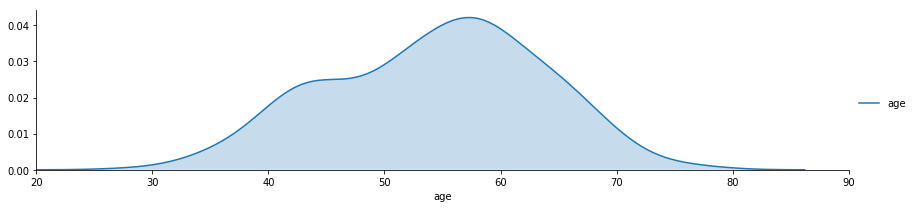

In [93]:
fig = sns.FacetGrid(data, aspect=4)
fig.map(sns.kdeplot, 'age', shade = True)
fig.add_legend()
fig.set(xlim = (20,90))

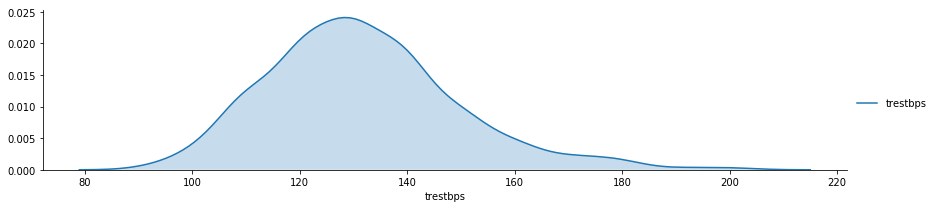

In [95]:
fig = sns.FacetGrid(data, aspect=4)
fig.map(sns.kdeplot, 'trestbps', shade = True)
fig.add_legend()
#fig.set(xlim = (20,90))

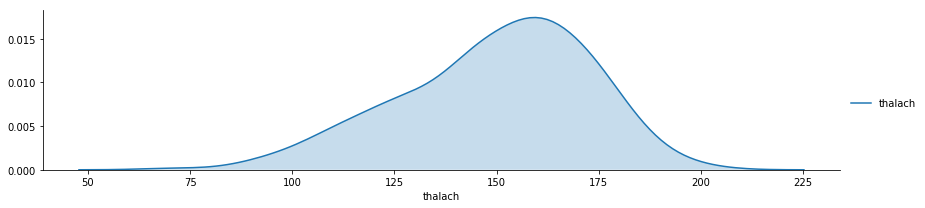

In [96]:
fig = sns.FacetGrid(data, aspect=4)
fig.map(sns.kdeplot, 'thalach', shade = True)
fig.add_legend()

In [292]:
mean = data.thalach.mean()
std = data.thalach.std()
mean, std

(149.64686468646866, 22.905161114914087)

In [293]:
pdf = thinkstats2.NormalPdf(mean, std)

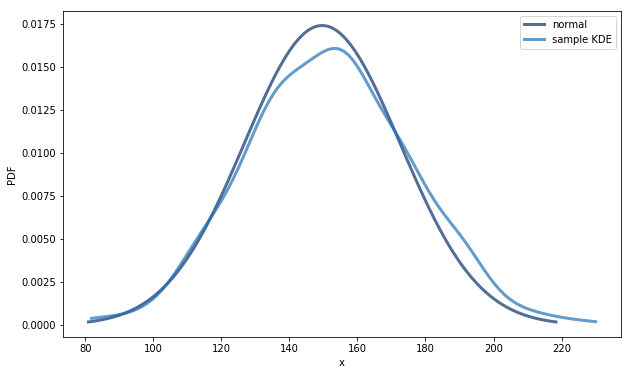

In [294]:
plt.figure(figsize=(10,6))
thinkplot.Pdf(pdf, label='normal')

sample = np.random.normal(mean, std, 500)
# Using a sample from the actual distribution, we can estimate the PDF using Kernel Density Estimation (KDE).
sample_pdf = thinkstats2.EstimatedPdf(sample, label='sample')

thinkplot.Pdf(sample_pdf, label='sample KDE')

thinkplot.Config(xlabel='x', ylabel='PDF')

In [300]:
mean1 = data.trestbps.mean()
std1 = data.trestbps.std()
mean1, std1

(131.62376237623764, 17.53814281351709)

In [301]:
pdf1 = thinkstats2.NormalPdf(mean1, std1)

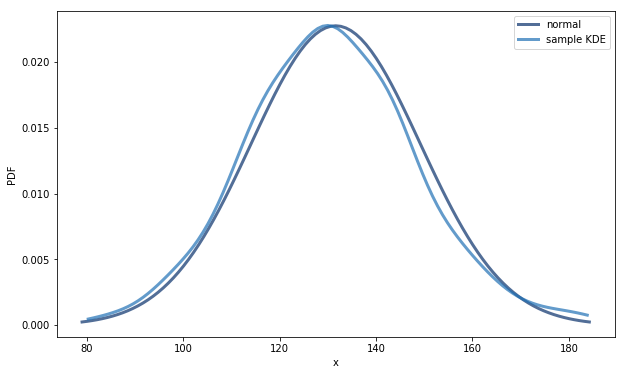

In [302]:
plt.figure(figsize=(10,6))
thinkplot.Pdf(pdf1, label='normal')

sample1 = np.random.normal(mean1, std1, 500)
# Using a sample from the actual distribution, we can estimate the PDF using Kernel Density Estimation (KDE).
sample_pdf1 = thinkstats2.EstimatedPdf(sample1, label='sample')

thinkplot.Pdf(sample_pdf1, label='sample KDE')

thinkplot.Config(xlabel='x', ylabel='PDF')

# BINOMIAL DIST

 What is the probability that the first person we choose from this data would have a heart disease?

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [375]:
total_people = data.shape[0]
total_people

303

In [376]:
dis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 14 columns):
age         165 non-null int64
sex         165 non-null int64
cp          165 non-null int64
trestbps    165 non-null int64
chol        165 non-null int64
fbs         165 non-null int64
restecg     165 non-null int64
thalach     165 non-null int64
exang       165 non-null int64
oldpeak     165 non-null float64
slope       165 non-null int64
ca          165 non-null int64
thal        165 non-null int64
target      165 non-null int64
dtypes: float64(1), int64(13)
memory usage: 19.3 KB


In [377]:
dis_people = dis.shape[0]
dis_people

165

In [378]:
p = dis_people / total_people
p

0.5445544554455446

In [379]:
q = 1-p
q

0.4554455445544554

In [380]:
n = 10

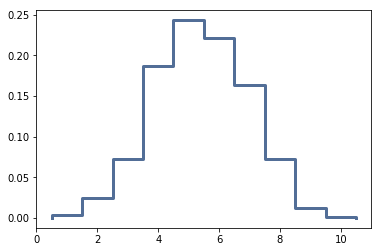

In [381]:
s = np.random.binomial(n,p,1000)
s_pmf = thinkstats2.Pmf(s)
thinkplot.Pmf(s_pmf)

In [382]:
s_cdf = thinkstats2.Cdf(s)

{'xscale': 'linear', 'yscale': 'linear'}

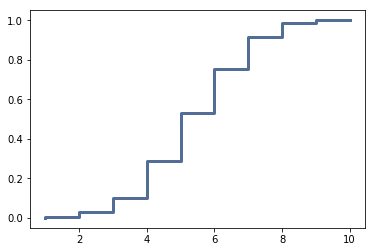

In [384]:
thinkplot.Cdf(s_cdf)

In [154]:
s_pmf.Prob(6)

0.272

In [162]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [165]:
# we are going to find the confidence interval for 95 %


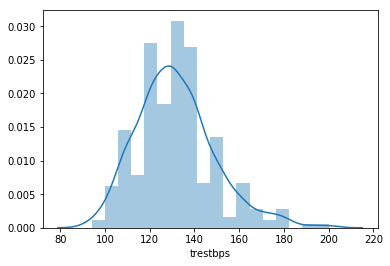

In [166]:
sns.distplot(data.trestbps)

In [167]:
n=len(data)

In [168]:
con_coeff=0.95

In [169]:
alpha=1-con_coeff

In [170]:
z_critical=norm.ppf(0.975)
z_critical

1.959963984540054

In [171]:
z_interval=norm.interval(alpha=con_coeff)

In [172]:
z_interval

(-1.959963984540054, 1.959963984540054)

In [173]:
x_bar=data['trestbps'].mean()

In [174]:
sigma=data['trestbps'].std()

In [175]:
standard_error=sigma/math.sqrt(n)

In [176]:
CI_lower=x_bar-z_critical*standard_error
CI_upper=x_bar+z_critical*standard_error

In [177]:
CI_lower,CI_upper

(129.64902030398173, 133.59850444849354)

With this sample size, we are 95% sure that our trestbps population mean lies between the upper and lower limit of the confidence interval.Although this confidence interval doesn't catch the mean parameter , it also has a much wider range.

# Confidence interval of the blood pressure for those who are suffering with the heart disease

In [179]:
data_tres=data[data['target']==1]['trestbps']


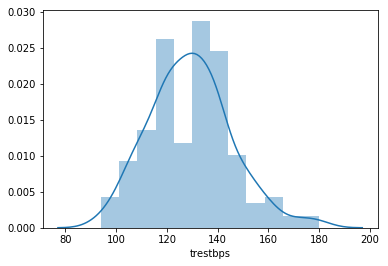

In [180]:
sns.distplot(data_tres)

In [181]:
x_bar=data_tres.mean()

In [182]:
sigma=data_tres.std()

In [183]:
n=len(data_tres)

In [184]:
CI_lower=x_bar-z_critical*standard_error
CI_upper=x_bar+z_critical*standard_error

In [185]:
CI_lower,CI_upper

(127.32828823077439, 131.27777237528622)

# Confidence interval of those who are not suffering

In [186]:
data_tres=data[data['target']==0]['trestbps']
x_bar=data_tres.mean()
sigma=data_tres.std()
n=len(data_tres)
CI_lower=x_bar-z_critical*standard_error
CI_upper=x_bar+z_critical*standard_error
CI_lower,CI_upper

(132.42380865238178, 136.3732927968936)

So we can see the difference between the confidence interval of the person's resting blood pressure suffering from heart disease and the one who's not and found out from the sample that the mean of the blood pressure of the person suffering from the heart disease is less than the one who is not suffering from the heart disease.

# Confidence interval of the cholestrol levels of those who are suffering from the heart disease


In [187]:
data_tres=data[data['target']==1]['chol']
x_bar=data_tres.mean()
sigma=data_tres.std()
n=len(data_tres)
CI_lower=x_bar-z_critical*standard_error
CI_upper=x_bar+z_critical*standard_error
CI_lower,CI_upper

(240.2555609580471, 244.20504510255893)

# Confidence interval of the cholestrol of those who are not suffering from the heart disease

In [188]:
data_tres=data[data['target']==0]['chol']
x_bar=data_tres.mean()
sigma=data_tres.std()
n=len(data_tres)
CI_lower=x_bar-z_critical*standard_error
CI_upper=x_bar+z_critical*standard_error
CI_lower,CI_upper

(249.11221444948322, 253.06169859399503)

So we can see the difference between the confidence interval of the person's cholestrol level suffering from heart disease and the one who's not and found out from the sample that the mean of the cholestrol of the person suffering from the heart disease is less than the one who is not suffering from the heart disease.

# Confidence interval of the age of peolple not suffering from the heart disease

In [189]:
data_tres=data[data['target']==0]['age']
x_bar=data_tres.mean()
sigma=data_tres.std()
n=len(data_tres)
CI_lower=x_bar-z_critical*standard_error
CI_upper=x_bar+z_critical*standard_error
CI_lower,CI_upper

(54.626707203106406, 58.576191347618234)

# Confidence interval of the age of peolple suffering from the heart diseases

In [190]:
data_tres=data[data['target']==1]['age']
x_bar=data_tres.mean()
sigma=data_tres.std()
n=len(data_tres)
CI_lower=x_bar-z_critical*standard_error
CI_upper=x_bar+z_critical*standard_error
CI_lower,CI_upper

(50.522227624713786, 54.471711769225614)

In [191]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# Hypothesis: That the person's maximum heart rate is a dependent factor for the person having a heart disease or not

In [192]:
spearman_coeffecient,pvalue=spearmanr(data['thalach'],data['target'])

In [193]:
print('Spearman rank correlation coffeceint is :',spearman_coeffecient)

Spearman rank correlation coffeceint is : 0.4283698921861041


In [194]:
table=pd.crosstab(data['thalach'],data['target'])

In [341]:
table.head()

target,0,1
thalach,,
71,1,0
88,1,0
90,1,0
95,1,0
96,1,1


In [195]:
chi2,p,dof,expected=chi2_contingency(table.values)

In [196]:
print('The chi square value is:',chi2,'The p value is:',p)

The chi square value is: 110.13495283153387 The p value is: 0.07347837419093241


Since the p value is greater than 0.05 we can say that the both factors are independent of each other and hence rejecting the hypothesis



# Hypothesis

We are now going to compare our mean to the actual value of people who suffers from the heart diseases.

### Hypothesis 1

H0 : The American Heart Association of the US claims that 48% of the total adults suffers from the heart diseases.

Source - (https://www.sciencedaily.com/releases/2019/01/190131084238.htm)

H1 : We claim that more than 48% of the people suffer from the heart diseases.

In [344]:
sample_mean=data['target'].mean()
mu=0.48
sigma=data['target'].std()
n=len(data['target'])

In [347]:
z_score=(sample_mean-mu)/(sigma/math.sqrt(n))
print(z_score)
p_value = \n(abs(z_score))
print('P-value= {} \n'.format(p_value) )
if p_value<0.05:
    print('P-value < Alpha: Reject H0')
else:
    print('P-value > Alpha: Accept H0')

2.2526348910929075
P-value= 0.012141089638294121 

P-value < Alpha: Reject H0


### Hypothesis 2

H0 : People of 65 or more are more susceptible to the heart diseases.

H1 :People of age less than 65 are more susceptible to the heart diseases.


In [204]:
data_age=data[data['target']==1]['age']
sample_mean=data_age.mean()
sigma=data_age.std()
n=len(data_age)
mu=65
sample_mean


52.4969696969697

In [349]:
z_score=(sample_mean-mu)/(sigma/math.sqrt(n))
p_value = scipy.stats.norm.sf(abs(z_score))
print('P-value= {}'.format(p_value))
if p_value<0.05:
    print('P-value < Alpha: Reject H0')
else:
    print('P-value > Alpha: Accept H0')

P-value= 0.012141089638294121
P-value < Alpha: Reject H0


## Bayes Theorem

In [351]:
values=data.values

In [359]:
def dict_1(x):
  dic={}
  for i in x:
    if i[13]==1:
      if i[0] in dic:
        dic[i[0]]+=1
      else:
        dic[i[0]]=1
  return dic
def dict_0(x):
    dic={}
    for i in x:
      if i[13]==0:
        if i[0] in dic:
          dic[i[0]]+=1
        else:
          dic[i[0]]=1
    return dic

In [362]:
def returnSum(dict):     
     sum = 0
     for i in dict.values(): 
        sum = sum + i 
       
     return sum

In [356]:
def prob(p,y):
  s=returnSum(y)
  prob=y[p]/s
  return prob



In [357]:
c=data['target']
cval=c.values
cval=cval.tolist()
prob_heart=cval.count(1)/len(cval)
prob_heart_0=1-prob_heart

### Given the age of a person is 45, what is the probability that the person has a heart disease?


In [360]:
val_1=dict_1(values)
val_0=dict_0(values)
ans=(prob(45,val_1)*prob_heart)/(prob(45,val_0)*prob_heart_0+prob(45,val_1)*prob_heart)


In [361]:
ans

0.75